# Practical Machine Learning
by Sven Mayer

## 	Lecture 12: Train, Validation, and Test Split

The material is licensed under the Creative Commons Attribution-Share Alike 4.0 (CC BY-SA) license: https://creativecommons.org/licenses/by-sa/4.0

### References
* https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
* https://scikit-learn.org/stable/modules/clustering.html#k-means

In [1]:
# Scikit-learn, see https://scikit-learn.org
import sklearn
import sklearn.svm
import sklearn.datasets

# Math operations
import numpy as np

# Drawing functions
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import pandas as pd

Creating two clusters with random points on a 2D plain grouped in two classes

In [2]:
lst = []
lst_mu = np.linspace(-2,2, 5)
lst_sigma = [2, 1, 0.5, 1, 2]
for i in range (5):
    for j in np.random.normal(lst_mu[i], lst_sigma[i], 1000):
        
        lst.append([i, j])

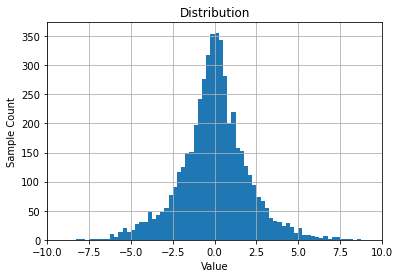

In [16]:
df = pd.DataFrame(lst)
df.columns = ["UserId", "Value"]
df.head()
df.Value.hist(range=(-10,10), bins=80)

plt.title("Distribution")
plt.xlim(-10, 10)
plt.xlabel('Value')
plt.ylabel('Sample Count')
plt.savefig("./figures/12_data.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()

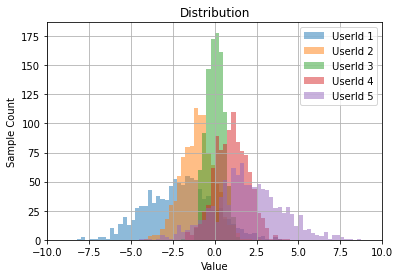

In [4]:
for u in sorted(df.UserId.unique()):
    dfX = df[df.UserId == u]
    dfX.Value.hist(range=(-10,10), bins=80, alpha=0.5, label=f"UserId {u+1}")
    
plt.title("Distribution")
plt.xlim(-10, 10)
plt.xlabel('Value')
plt.ylabel('Sample Count')
plt.legend(loc=1)
plt.savefig("./figures/12_data_by_p.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()

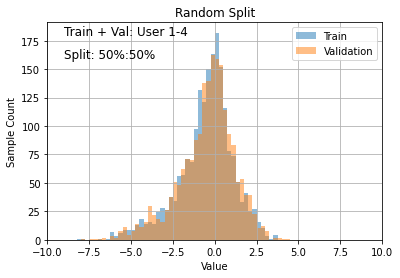

In [11]:
dfX = df[df.UserId.isin(list(range(4)))]
dfX = dfX.sample(frac = .5, random_state=42)
dfX.Value.hist(range=(-10,10), bins=80, alpha=0.5, label="Train")

dfX = df[(df.index.isin(dfX.index) == False) & (df.UserId != 4)]
dfX.Value.hist(range=(-10,10), bins=80, alpha=0.5, label="Validation")


plt.text (-9,180, "Train + Val: User 1-4", size=12)
plt.text (-9,160, "Split: 50%:50%", size=12)


plt.title("Random Split")
plt.xlim(-10, 10)
plt.xlabel('Value')
plt.ylabel('Sample Count')
plt.legend(loc=1)
plt.savefig("./figures/12_data_split_random.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()

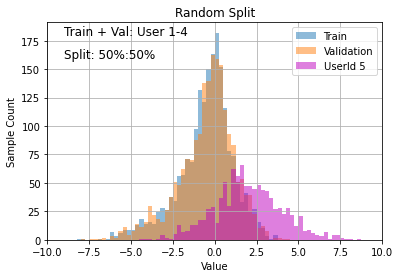

In [12]:

dfX = df[df.UserId.isin(list(range(4)))]
dfX = dfX.sample(frac = .5, random_state=42)
dfX.Value.hist(range=(-10,10), bins=80, alpha=0.5, label="Train")

dfX = df[(df.index.isin(dfX.index) == False) & (df.UserId != 4)]
dfX.Value.hist(range=(-10,10), bins=80, alpha=0.5, label="Validation")

dfX = df[df.UserId == 4]
dfX.Value.hist(range=(-10,10), bins=80, alpha=0.5, color="m", label=f"UserId {u+1}")

plt.text (-9,180, "Train + Val: User 1-4", size=12)
plt.text (-9,160, "Split: 50%:50%", size=12)

plt.title("Random Split")
plt.xlim(-10, 10)
plt.xlabel('Value')
plt.ylabel('Sample Count')
plt.legend(loc=1)
plt.savefig("./figures/12_data_split_random_W.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()

[0, 1, 4]


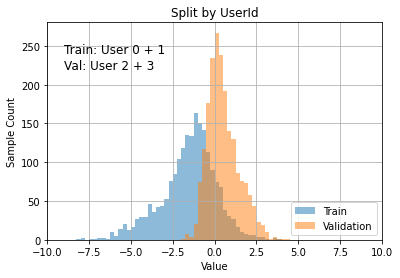

In [13]:
f = list(range(2))
dfX = df[df.UserId.isin(f)]
dfX.Value.hist(range=(-10,10), bins=80, alpha=0.5, label="Train")

f.extend([4])
print(f)
dfX = df[False == df.UserId.isin(f)]
dfX.Value.hist(range=(-10,10), bins=80, alpha=0.5, label="Validation")


plt.text (-9,240, "Train: User 0 + 1", size=12)
plt.text (-9,220, "Val: User 2 + 3", size=12)

plt.title("Split by UserId")
plt.xlim(-10, 10)
plt.xlabel('Value')
plt.ylabel('Sample Count')
plt.legend(loc=4)
plt.savefig("./figures/12_data_split_p.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()

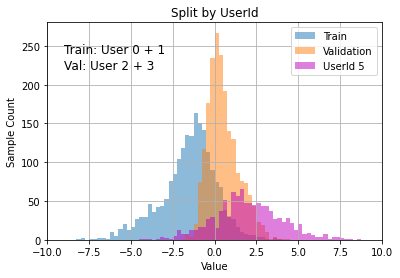

In [14]:

f = list(range(2))
dfX = df[df.UserId.isin(f)]
dfX.Value.hist(range=(-10,10), bins=80, alpha=0.5, label="Train")

f.extend([4])
dfX = df[False == df.UserId.isin(f)]
dfX.Value.hist(range=(-10,10), bins=80, alpha=0.5, label="Validation")


dfX = df[df.UserId == 4]
dfX.Value.hist(range=(-10,10), bins=80, alpha=0.5, color="m", label=f"UserId {u+1}")

plt.title("Split by UserId")


plt.text (-9,240, "Train: User 0 + 1", size=12)
plt.text (-9,220, "Val: User 2 + 3", size=12)

plt.xlim(-10, 10)
plt.xlabel('Value')
plt.ylabel('Sample Count')
plt.legend(loc=1)
plt.savefig("./figures/12_data_split_p_W.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()